In [11]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output, State
from flask_caching import Cache
# from asinparser import AsinParser
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import os
import plotly.graph_objs as go

In [6]:
df = pd.read_csv('aws_reviews_sample.csv')

In [13]:
wordcloud, frequency_figure, treemap = plotly_wordcloud(df)

In [38]:
wordcloud

In [41]:
d = {'f':0.5, 'd' : 0.001}

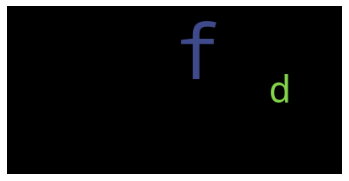

In [42]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=set(STOPWORDS), max_words=100, max_font_size=90).fit_words(d)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:

"""A wonderful function that returns figure data for three equally
wonderful plots: wordcloud, frequency histogram and treemap"""
complaints_text = list(df["review"].dropna().values)

# join all documents in corpus
text = " ".join(list(complaints_text))

word_cloud = WordCloud(stopwords=set(STOPWORDS), max_words=100, max_font_size=90)
word_cloud.generate(text)

word_list = []
freq_list = []
fontsize_list = []
position_list = []
orientation_list = []
color_list = []

for (word, freq), fontsize, position, orientation, color in word_cloud.layout_:
    word_list.append(word)
    freq_list.append(freq)
    fontsize_list.append(fontsize)
    position_list.append(position)
    orientation_list.append(orientation)
    color_list.append(color)

# get the positions
x_arr = []
y_arr = []
for i in position_list:
    x_arr.append(i[0])
    y_arr.append(i[1])

# get the relative occurence frequencies
new_freq_list = []
for i in freq_list:
    new_freq_list.append(i * 80)

trace = go.Scatter(
    x=x_arr,
    y=y_arr,
    textfont=dict(size=new_freq_list, color=color_list),
    hoverinfo="text",
    textposition="top center",
    hovertext=["{0} - {1}".format(w, f) for w, f in zip(word_list, freq_list)],
    mode="text",
    text=word_list,
)

layout = go.Layout(
    {
        "xaxis": {
            "showgrid": False,
            "showticklabels": False,
            "zeroline": False,
            "automargin": True,
            "range": [-100, 250],
        },
        "yaxis": {
            "showgrid": False,
            "showticklabels": False,
            "zeroline": False,
            "automargin": True,
            "range": [-100, 450],
        },
        "margin": dict(t=20, b=20, l=10, r=10, pad=4),
        "hovermode": "closest",
    }
)

wordcloud_figure_data = {"data": [trace], "layout": layout}
word_list_top = word_list[:25]
word_list_top.reverse()
freq_list_top = freq_list[:25]
freq_list_top.reverse()

frequency_figure_data = {
    "data": [
        {
            "y": word_list_top,
            "x": freq_list_top,
            "type": "bar",
            "name": "",
            "orientation": "h",
        }
    ],
    "layout": {"height": "550", "margin": dict(t=20, b=20, l=100, r=20, pad=4)},
}
treemap_trace = go.Treemap(
    labels=word_list_top, parents=[""] * len(word_list_top), values=freq_list_top
)
treemap_layout = go.Layout({"margin": dict(t=10, b=10, l=5, r=5, pad=4)})
treemap_figure = {"data": [treemap_trace], "layout": treemap_layout}

SyntaxError: 'return' outside function (3388477058.py, line 93)

In [29]:
freq_list_top

[0.08552631578947369,
 0.08552631578947369,
 0.08552631578947369,
 0.08552631578947369,
 0.09868421052631579,
 0.09868421052631579,
 0.09868421052631579,
 0.09868421052631579,
 0.10526315789473684,
 0.1118421052631579,
 0.1118421052631579,
 0.14473684210526316,
 0.14473684210526316,
 0.1513157894736842,
 0.16447368421052633,
 0.16447368421052633,
 0.17763157894736842,
 0.20394736842105263,
 0.23684210526315788,
 0.23684210526315788,
 0.2565789473684211,
 0.2631578947368421,
 0.5723684210526315,
 0.756578947368421,
 1.0]

In [28]:
word_list_top

['sit',
 's',
 'made',
 'idea',
 'didn t',
 'great',
 'money',
 'one',
 'return',
 'hang',
 'around',
 'use',
 'neck',
 'will',
 'doesn t',
 'small',
 'base',
 'hook',
 'work',
 'product',
 't fit',
 'fit around',
 'fit',
 'sink',
 'faucet']

In [3]:
db = pd.read_csv('aws_reviews_sample.csv')

In [4]:
db[db['asin'] == 'x'].review.empty

True

In [47]:
print(l)


I have a newer style faucet in my house and the neck of this item did not even fit around the base of the faucet. I tried keeping it hooked around the water conditioner base but it would not hold. The neck of the item is very flimsy. The sponges that come with these I did not use at all as they are inferior to the ones I purchase at the dollar store.

Watch the girth of your faucet! Mine faucet is wide, the hook couldn’t fit around it. I had to return it.

My faucet is a large spout with built in pullout sprayer. The base is too big. Am finding other ways to use these.

They should state that it only fits very narrow faucets.

The product idea is genius, but our faucet is larger in diameter than the product allows so it isn't a good fit in our sink.

Missing a strainer. Bag looks like it has been reused.

Not made for a gooseneck faucet or one that is wide at the bottom

The curve handle did not fit my faucet. I had to strap it with a tie

I ordered these for myself and two daughters.

In [46]:
l = ''
[i for i in df[df['asin'] == 'B09S6FWS7W'].review]
    l = l+str(i)
l

['\nI have a newer style faucet in my house and the neck of this item did not even fit around the base of the faucet. I tried keeping it hooked around the water conditioner base but it would not hold. The neck of the item is very flimsy. The sponges that come with these I did not use at all as they are inferior to the ones I purchase at the dollar store.\n',
 '\nWatch the girth of your faucet! Mine faucet is wide, the hook couldn’t fit around it. I had to return it.\n',
 '\nMy faucet is a large spout with built in pullout sprayer. The base is too big. Am finding other ways to use these.\n',
 '\nThey should state that it only fits very narrow faucets.\n',
 "\nThe product idea is genius, but our faucet is larger in diameter than the product allows so it isn't a good fit in our sink.\n",
 '\nMissing a strainer. Bag looks like it has been reused.\n',
 '\nNot made for a gooseneck faucet or one that is wide at the bottom\n',
 '\nThe curve handle did not fit my faucet. I had to strap it with 